<a href="https://colab.research.google.com/github/fraanglen/AIML-PROJECT/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



0.2844827586206896

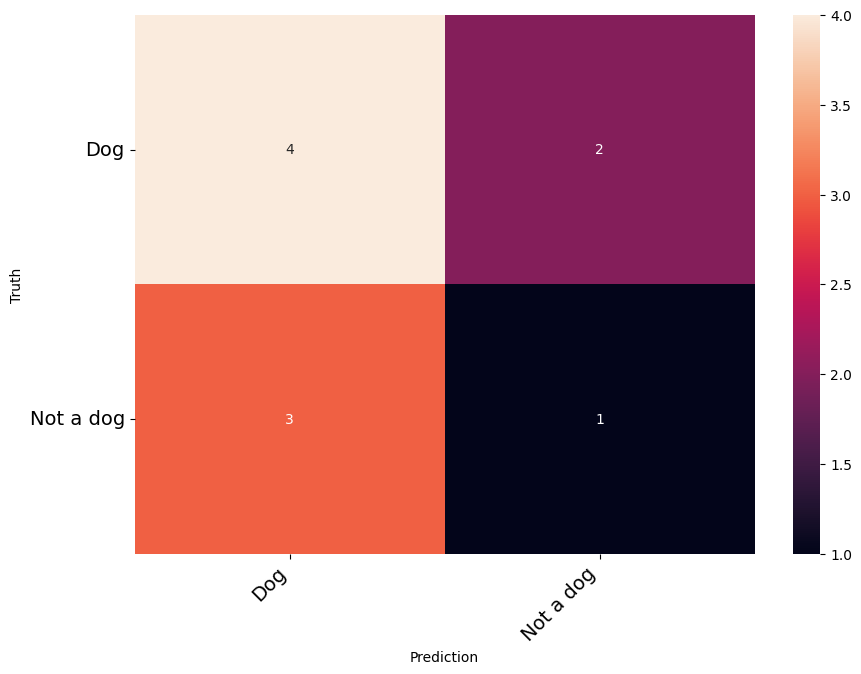

In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize =
(10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog",
"Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",       "Dog","Not a dog","Dog", "Not a dog",
"Dog",       "Not a dog", "Dog", "Dog"]

cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])

print(classification_report(truth, prediction))

2*(0.57*0.67/(0.57+0.67))# f1 score for Dog class

2*(0.33*0.25/(0.33+0.25))# f1 score for Not a dog class

Accuracy: 0.3333333333333333


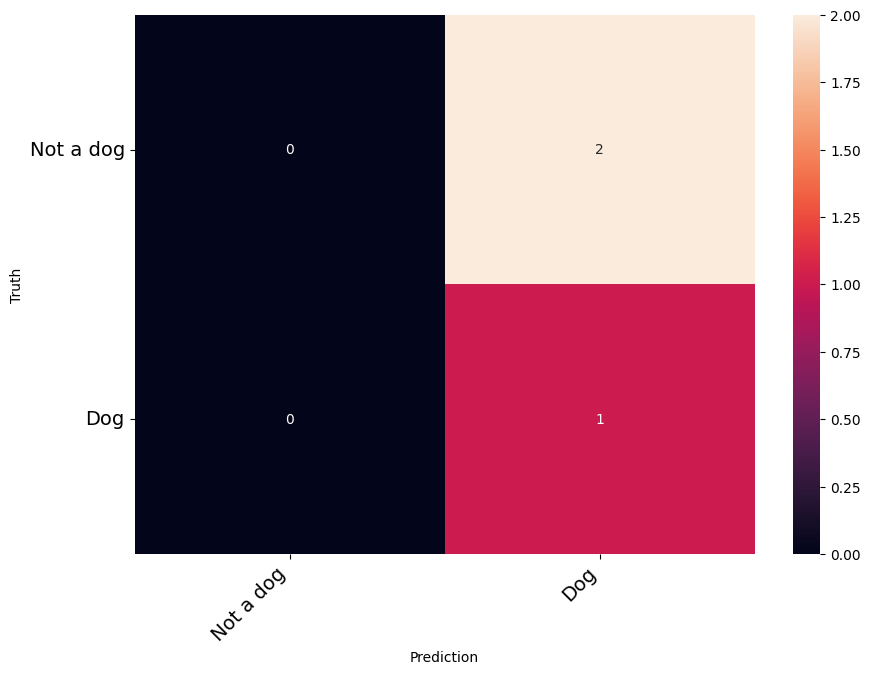

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Use the truth and prediction data from the previous cell
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog",
"Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",       "Dog","Not a dog","Dog", "Not a dog",
"Dog",       "Not a dog", "Dog", "Dog"]

# Convert labels to numerical format (e.g., 1 for Dog, 0 for Not a dog)
# This is a simplified representation as we don't have the original features
y = [1 if label == "Dog" else 0 for label in truth]
# For this example, we'll use the 'prediction' as a single feature,
# which is not how logistic regression is typically used, but demonstrates the structure.
# In a real scenario, you would use the actual features that led to these predictions.
X = [[1] if label == "Dog" else [0] for label in prediction]


# Split data into training and testing sets
# With only 10 samples, splitting might not be ideal for a robust model,
# but we'll do it for demonstration.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names for the confusion matrix
class_names = ["Not a dog", "Dog"] # Assuming 0 is Not a dog and 1 is Dog

# Print the confusion matrix using the predefined function
# You need to make sure the print_confusion_matrix function from the previous cell is defined and accessible
try:
    print_confusion_matrix(cm, class_names)
except NameError:
    print("The function 'print_confusion_matrix' is not defined. Please ensure the cell defining this function has been run.")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")